In [287]:
import matplotlib.pyplot as plt
from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
from matplotlib import colormaps
from pathlib import Path
import numpy as np
from pycurrents.file.binfile_n import BinfileSet


In [288]:
# Read in the data. 
file_id = Dataset('/home/jamie/projects/atlantic_sst/noaacwBLENDEDsstDNDaily_e5b2_b4c7_9276_U1717797277907.nc')
# print(file_id.variables)

In [289]:
def arrayrbins(files):
    mat = list()
    for i in files:
        tmp = BinfileSet(str(i))
        mat.append(tmp.array)
    mat = np.vstack(mat)
    return(mat) 

def readrbins(pth, sensor, tag):
    tag = "*" + tag + "*.rbin"
    files = sorted(Path(pth+sensor+"/").glob(tag))
    mat = arrayrbins(files)

    #cols = BinfileSet(str(files[0])).columns
    mat = np.array(mat) #, dtype=cols)
    return(mat)

In [290]:
# get gps location
sea = readrbins(pth ='/home/jamie/projects/atlantic_sst/', sensor = 'seapath380', tag = 'gps')
gyro = readrbins(pth ='/home/jamie/projects/atlantic_sst/', sensor = 'gyro', tag = 'hdg')

In [305]:
sea = readrbins(pth ='/mnt/revelle-data/RR2407/adcp_uhdas/RR2407/rbin/', sensor = 'seapath380', tag = 'gps')

array([[157.84328471, 157.84328472, -76.66808767, ...,   2.        ,
          0.9       ,  18.90697045],
       [157.84329628, 157.8432963 , -76.66809565, ...,   2.        ,
          0.9       ,  18.90698202],
       [157.84330786, 157.84330787, -76.66810333, ...,   2.        ,
          0.9       ,  18.9069936 ],
       ...,
       [159.49997452, 159.49997454, -74.53404513, ...,   2.        ,
          0.9       ,  20.56366026],
       [159.49998609, 159.49998611, -74.53404588, ...,   2.        ,
          0.9       ,  20.56367184],
       [159.49999767, 159.49999769, -74.53404663, ...,   2.        ,
          0.9       ,  20.56368341]])

In [279]:
tmp = BinfileSet("/home/jamie/projects/atlantic_sst/seapath380/rr2024_157_72859.gps.rbin")
'/mnt/revelle-data/RR2407/adcp_uhdas/RR2407/rbin/seapath380/'
#tmp = BinfileSet("/home/jamie/projects/atlantic_sst/gyro/rr2024_157_72859.hdg.rbin")
tmp.columns

['u_dday', 'dday', 'lon', 'lat', 'quality', 'hdop', 'm_dday']

In [291]:
sst = file_id.variables["analysed_sst"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
mask = file_id.variables["mask"][:]
file_id.close()

In [292]:
# pull out most regent heading and convert to radians. 
theta = gyro[-1,1] *(np.pi/180) # to radians
pos = sea[-1]

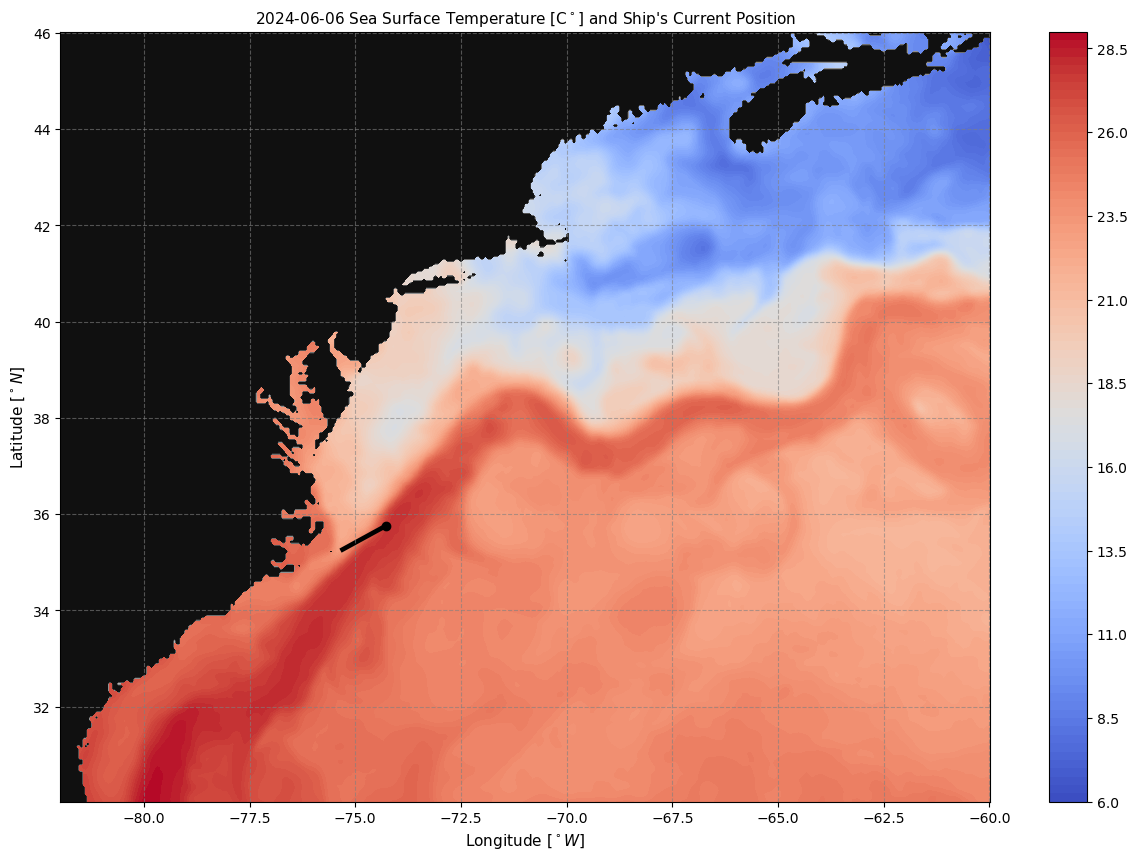

In [303]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
ax1.contourf(lon, lat, mask[0,:,:], cmap = "binary")
ax1.contourf(lon, lat, sst[0,:,:], 100, cmap = "coolwarm")
# Once I have position I should be fine with heading from the gyro. 
ax1.grid(color = "grey", linestyle = '--', alpha = 0.6)# visible=None)
c = ax1.contourf(lon, lat, sst[0,:,:], 100, cmap = "coolwarm")
cbar = fig.colorbar(c)
ax1.quiver(pos[2], pos[3], np.cos(theta), np.sin(theta), headlength=0.0001, headaxislength=0.0001, width = 0.005)
ax1.scatter(pos[2], pos[3], color = "black")
# cbar.set_label("Sea Surface Temperature [C$^\circ$]")
ax1.set_xlabel("Longitude [$^\circ W$]", size = 11)
ax1.set_ylabel("Latitude [$^\circ N$]", size = 11)
ax1.set_title("2024-06-06 Sea Surface Temperature [C$^\circ$] and Ship's Current Position", size = 11);
plt.show()